In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')   

<h1> 35 Insights regarading Chicago Crimes </h1>

In [2]:
crime = pd.read_csv(r"E:\Portable_data\Codes\Chicago_Crimes.csv")
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [3]:
crime['Date'] = pd.to_datetime(crime['Date'], errors='coerce')
crime['Year'] = crime['Date'].dt.year
crime['Month'] = crime['Date'].dt.month
crime['Day'] = crime['Date'].dt.day
crime['Hour'] = crime['Date'].dt.hour
crime['Weekday'] = crime['Date'].dt.day_name()

<h1>1. Total Crimes per Year</h1>

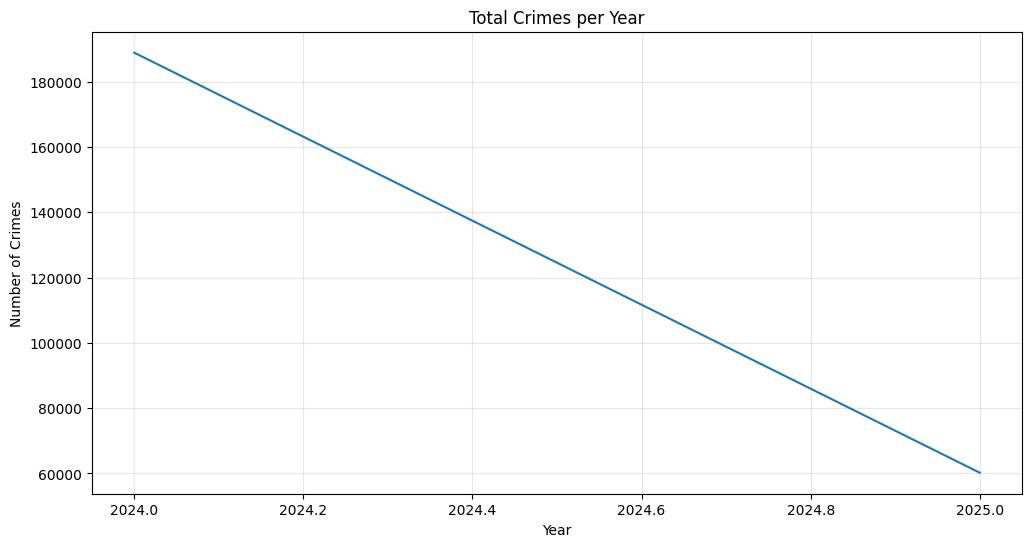

In [4]:
crime.groupby('Year').size().plot(kind='line', figsize=(12,6))
plt.title("Total Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: The annual distribution shows how crime level drop over time making it possible to see how crimes are  falling. </h3>
<h3>Insight 2: Sudden shifts between crime rate in year may be linked to policy changes, economic conditions, or other external factors. </h3>

<h1>2. Crimes per Month</h1>

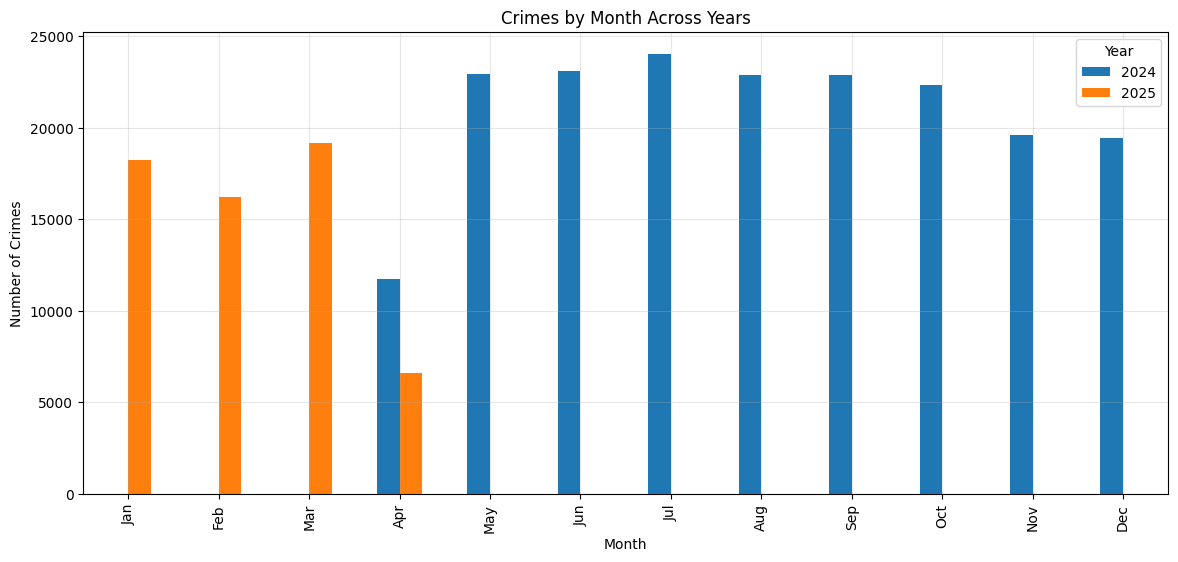

In [5]:
monthly_crimedata = crime.groupby(['Month','Year']).size().unstack()

monthly_crimedata.plot(kind='bar', figsize=(14,6))
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Crimes by Month Across Years")
plt.ylabel("Number of Crimes")
plt.legend(title='Year')
plt.grid(alpha=0.3)
plt.show()

<h1>Insights</h1>
<h3>Insight 1: Monthly crime trends highlight repeating seasonal patterns like certain months showing consistently higher crime levels. </h3>
<h3>Insight 2: It is noticable that dec there was a sudden shift of crime rate during april. </h3>

<h1>3. Crimes by Day of the Week</h1>

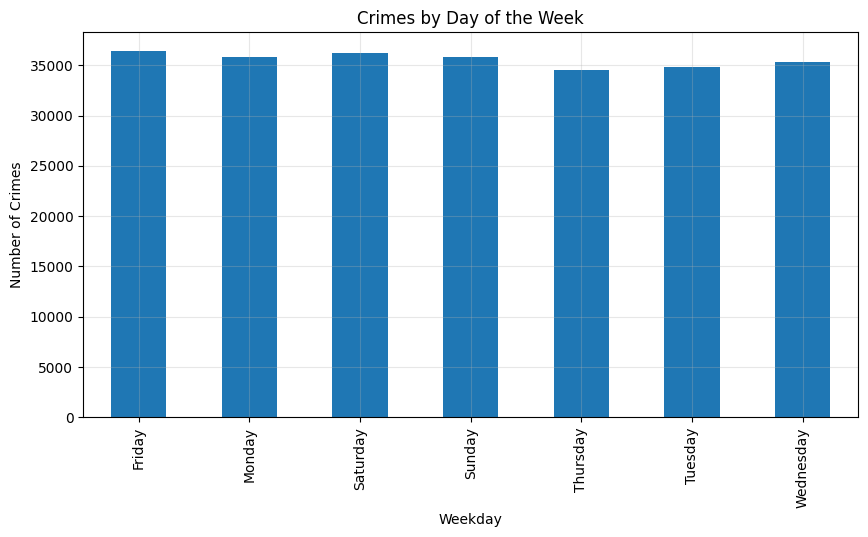

In [6]:
crime.groupby('Weekday').size().plot(kind='bar', figsize=(10,5))
plt.title("Crimes by Day of the Week")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: Certain weekdays experience more crimes, showing that criminal activity follows social and work patterns. </h3>
<h3>Insight 2: Weekends may see higher numbers due to nightlife, gatherings, or increased outdoor activities for people.</h3>

<h1>4. Crimes by Hour of the Day</h1>

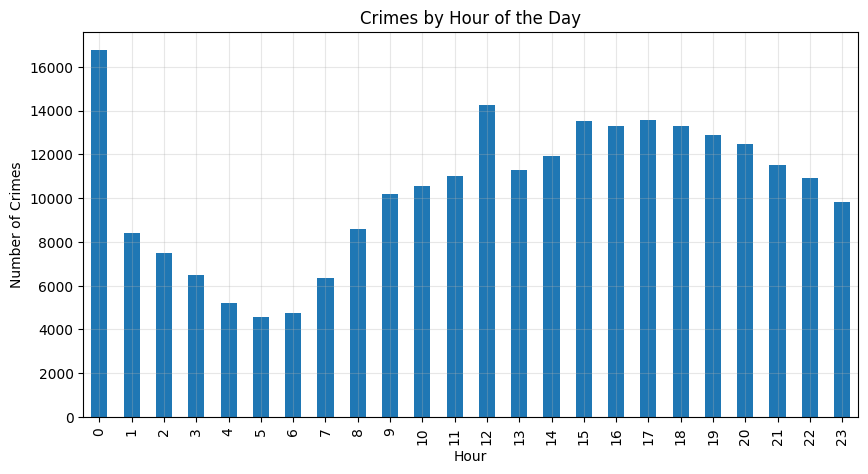

In [7]:
crime.groupby('Hour').size().plot(kind='bar', figsize=(10,5))
plt.title("Crimes by Hour of the Day")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: Crime levels vary widely across hours often spiking during evening and night times. </h3>
<h3>Insight 2: This graph shows how crime aligns with human activity levels such as nightlife and commuting periods.</h3>

<h1>5. Most Common Primary Crime Types</h1>

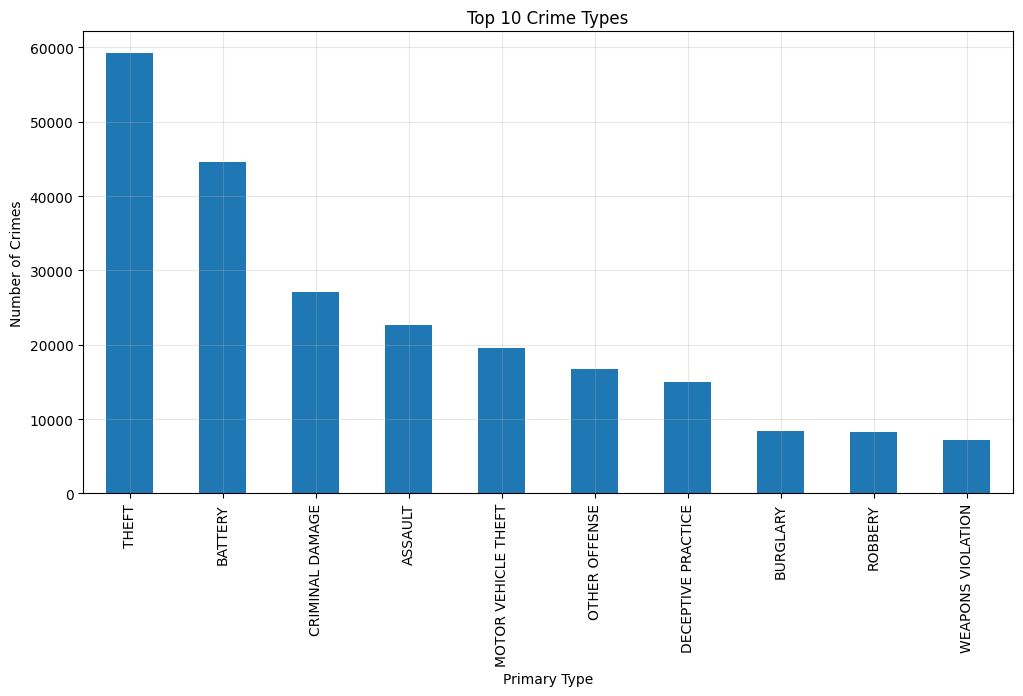

In [8]:
crime['Primary Type'].value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Crime Types")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: Theft, battery, and narcotics are among the most reported crimes showing the most pressing criminal issues in Chicago. </h3>
<h3>Insight 2: Concentrating on these categories could result the greatest benefits for crime prevention strategies.</h3>

<h1>6. Arrests vs Non-Arrests</h1>

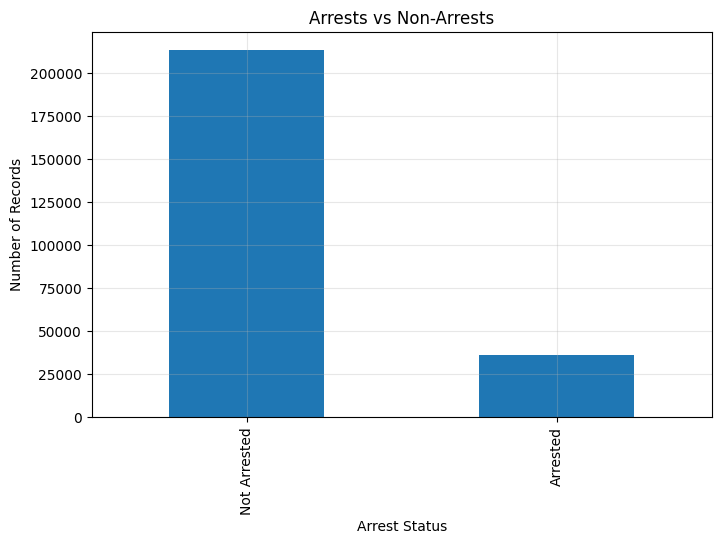

In [9]:
arrest_counts = crime['Arrest'].value_counts()
arrest_counts.index = arrest_counts.index.map({True: "Arrested", False: "Not Arrested"})

arrest_counts.plot(kind='bar', figsize=(8,5))
plt.title("Arrests vs Non-Arrests")
plt.ylabel("Number of Records")
plt.xlabel("Arrest Status")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: A majority of reported crimes do not lead to arrests  showing potential gaps in evidence collection or law enforcement resources. </h3>
<h3>Insight 2: This imbalance shows the challenge of turning reported crimes into successful arrests and prosecutions since alot of crime doers were not arrested.</h3>

<h1>7. Domestic vs Non-Domestic Crimes</h1>

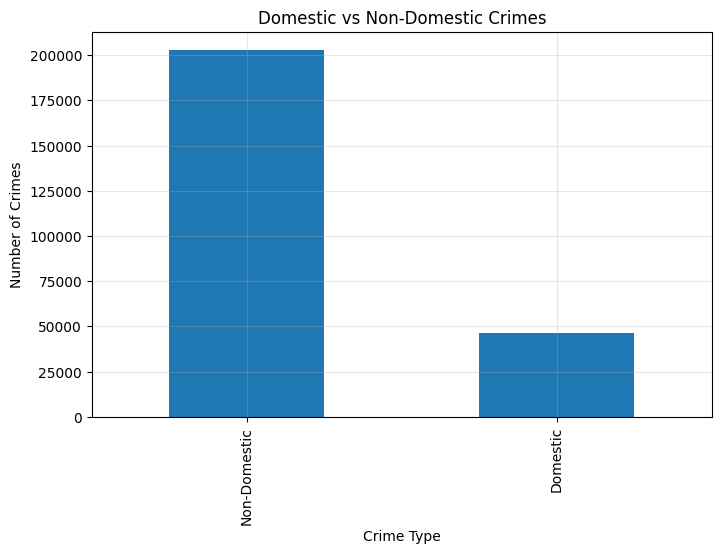

In [ ]:
domestic_counts = crime['Domestic'].value_counts()
domestic_counts.index = domestic_counts.index.map({True: "Domestic", False: "Non-Domestic"})


domestic_counts.plot(kind='bar', figsize=(8,5))
plt.title("Domestic vs Non-Domestic Crimes")
plt.ylabel("Number of Crimes")
plt.xlabel("Crime Type")
plt.grid(alpha=0.3)
plt.show()



<h1>Insights</h1>
<h3>Insight 1: Domestic related crimes form a smaller but significant part of the total showing that family and household conflicts play a role in crime rates. </h3>
<h3>Insight 2: The bar graph emphasizes the importance of social programs and Non-domestic violence prevention efforts.</h3>

<h1>8. Crimes by Location Description</h1>

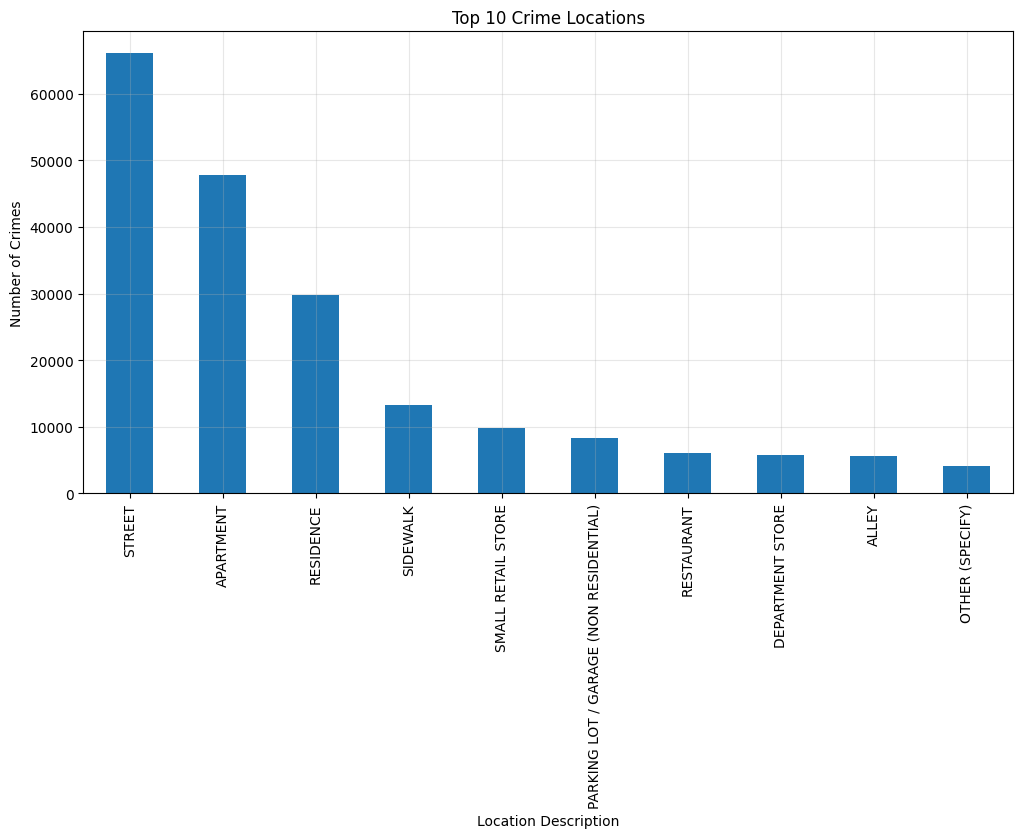

In [11]:
crime['Location Description'].value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Crime Locations")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: Streets, residences, and apartments dominate as the most common crime locations showing  where people spend most of their time. </h3>
<h3>Insight 2: Public areas like streets also attract higher crime numbers due to accessibility and lack of constant monitoring.</h3>

<h1>9. Crimes by Community Area</h1>

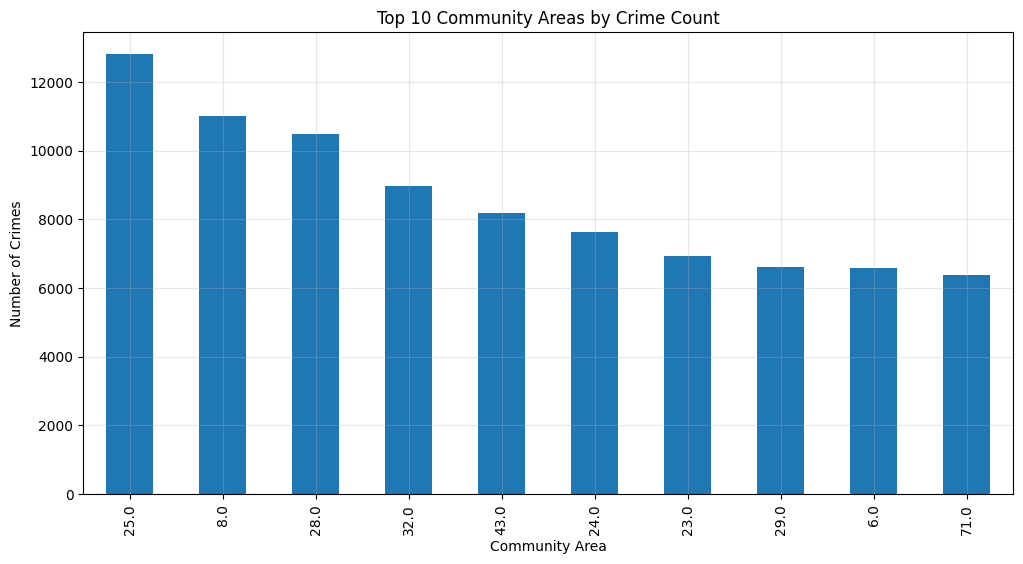

In [12]:
crime['Community Area'].value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Community Areas by Crime Count")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: Certain community areas experience significantly higher numbers of crimes making them hotspots that need focused interventions.</h3>
<h3>Insight 2: This concentration indicates uneven distribution of crime across the city where it decreases as it goes likely due to different community.</h3>

<h1>10. Crimes per Police District</h1>

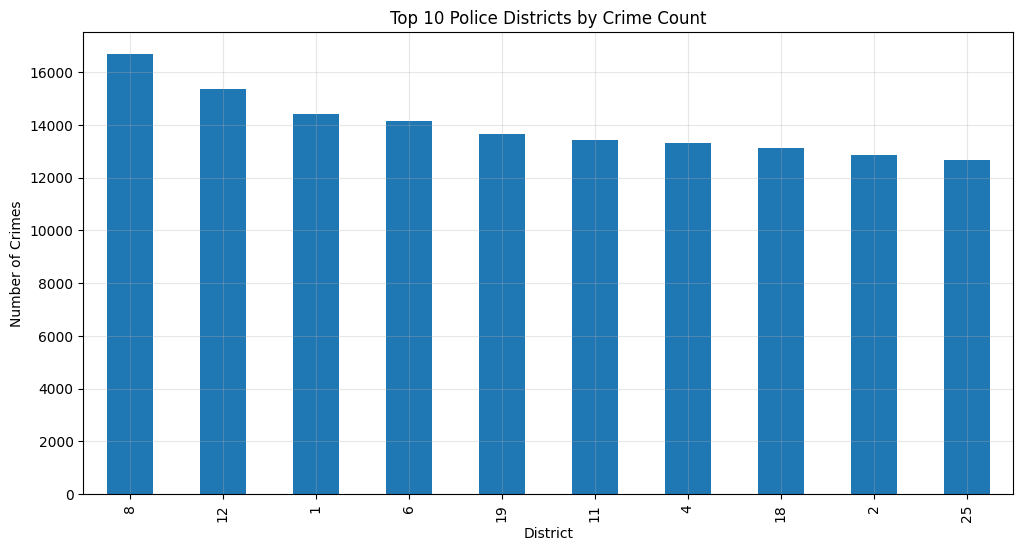

In [13]:
crime['District'].value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Police Districts by Crime Count")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: Some police districts consistently report higher crime levels suggesting that resources may need to be unevenly distributed.</h3>
<h3>Insight 2: These variations also reflect different neighborhood populations, environments, and local challenges.</h3>

<h1>11. Theft Trends by Year</h1>

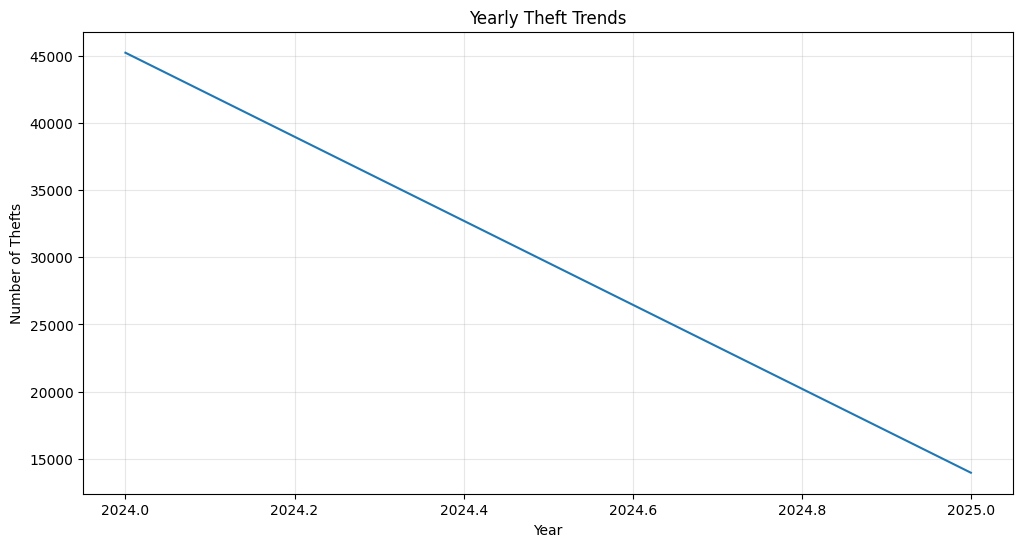

In [14]:
crime[crime['Primary Type']=='THEFT'].groupby('Year').size().plot(kind='line', figsize=(12,6))
plt.title("Yearly Theft Trends")
plt.ylabel("Number of Thefts")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: Theft shows noticeable drop across years decreasing significantly.</h3>
<h3>Insight 2: This drop suggests that theft is sensitive to both law enforcement efforts and economic conditions making the rate drop.</h3>

<h1>12. Battery Trends by Year</h1>

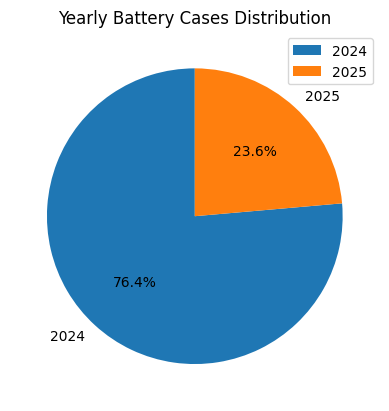

In [ ]:
battery_counts = crime[crime['Primary Type'] == 'BATTERY'].groupby('Year').size()

battery_counts.plot(kind='pie',autopct='%1.1f%%',startangle=90,ylabel="",legend=True)
plt.title("Yearly Battery Cases Distribution")
plt.show()




<h1>Insights</h1>
<h3>Insight 1: Battery remains one of the most stable yet persistently high crime categorie during 2024 with 76.4% of the total crime both years combined. </h3>
<h3>Insight 2: It consistently decrease suggesting that ongoing interventions around violence prevention is taking effect during 2025 with only 23.6%. </h3>

<h1>13. Narcotics Trends by Year</h1>

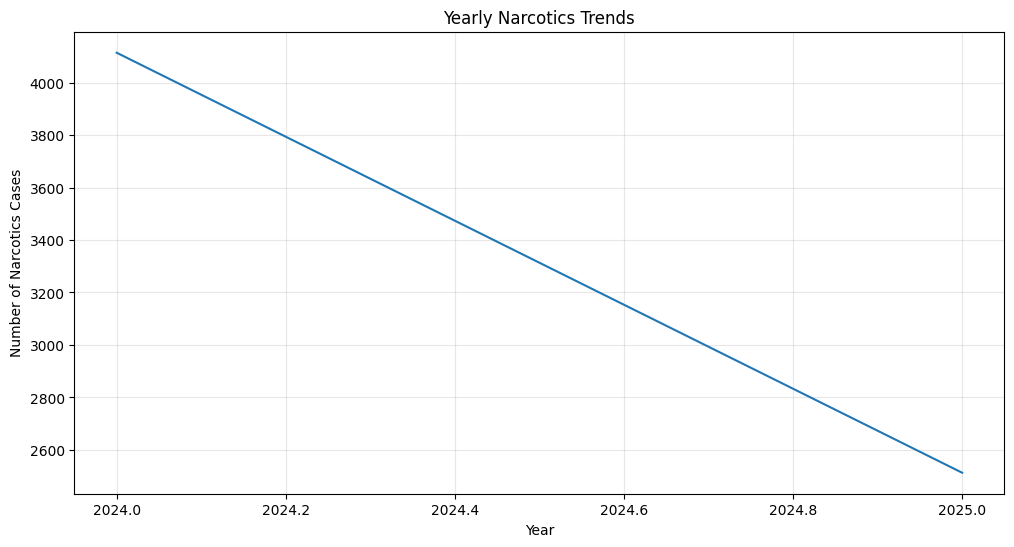

In [16]:
crime[crime['Primary Type']=='NARCOTICS'].groupby('Year').size().plot(kind='line', figsize=(12,6))
plt.title("Yearly Narcotics Trends")
plt.ylabel("Number of Narcotics Cases")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: Narcotics related crimes show strong shifts across years decreasing as new enforcement policies take effect. </h3>
<h3>Insight 2: These changes suggest that narcotics are highly influenced by targeted policing and drug market fluctuations.</h3>

<h1>14. Assault by Year</h1>

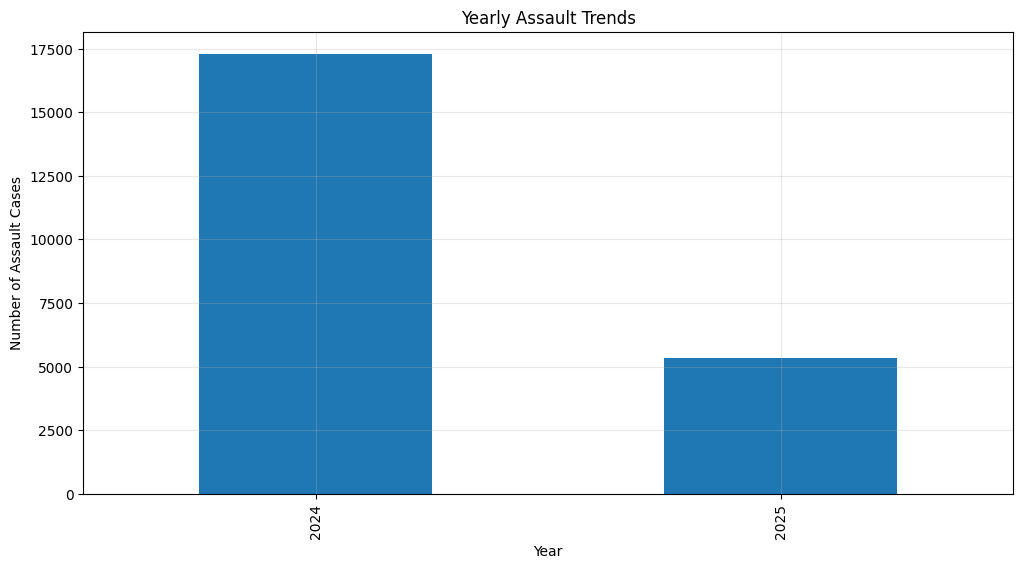

In [17]:
crime[crime['Primary Type']=='ASSAULT'].groupby('Year').size().plot(kind='bar', figsize=(12,6))
plt.title("Yearly Assault Trends")
plt.ylabel("Number of Assault Cases")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: Assault levels vary but remain consistently high during 2024 confirming it as a core category of violent crime during that year.</h3>
<h3>Insight 2: This level highlights how personal disputes and conflicts contribute strongly to crime rates.</h3>

<h1>15. Crimes on Streets vs Residences</h1>

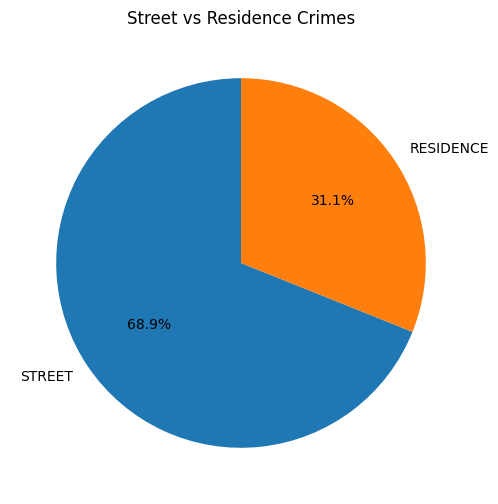

In [23]:
location_counts = crime[crime['Location Description'].isin(['STREET','RESIDENCE'])]['Location Description'].value_counts()


location_counts.plot(kind='pie',autopct='%1.1f%%',startangle=90,figsize=(6,6),ylabel="")
plt.title("Street vs Residence Crimes")
plt.show()


<h1>Insights</h1>
<h3>Insight 1:Streets have the highest number of reported crimes with over 68.9% but residences also account for a large share of incidents with its 31.1%. </h3>
<h3>Insight 2: This balance shows that both public and private spaces are vulnerable in different ways.</h3>

<h1>16. Arrest Rate by Primary Type</h1>

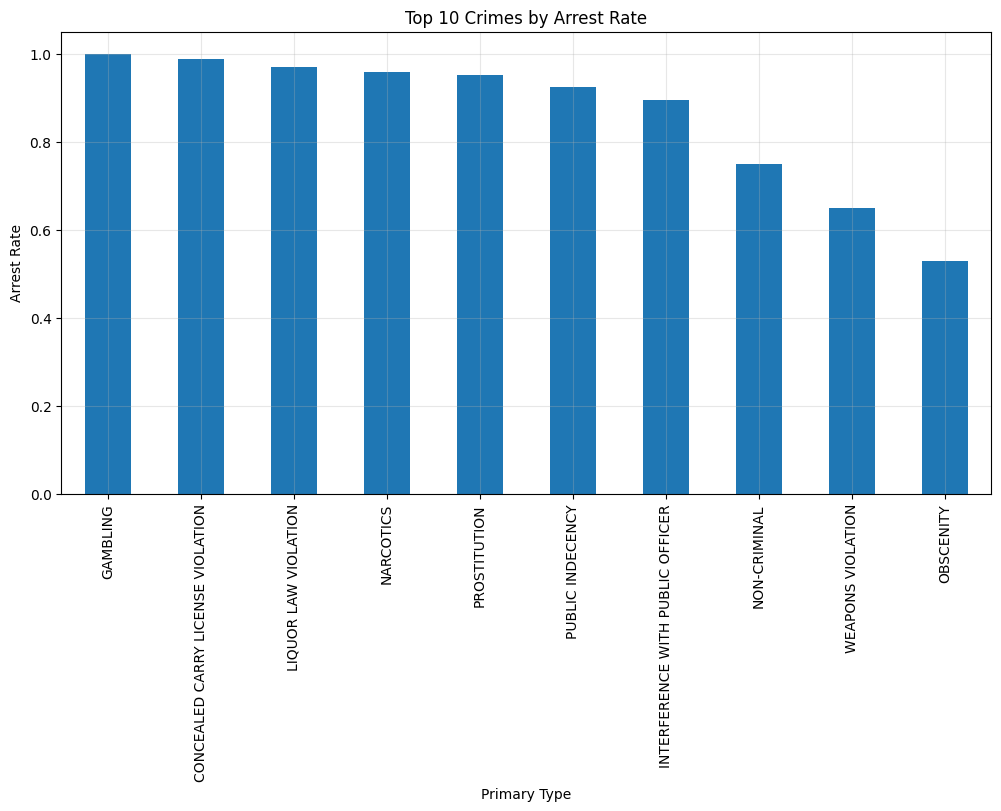

In [19]:
crime.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Crimes by Arrest Rate")
plt.ylabel("Arrest Rate")
plt.grid(alpha=0.3)
plt.show()

<h1>Insights</h1>
<h3>Insight 1: Certain crimes like gambling have much higher arrest rates compared to others. </h3>
<h3>Insight 2: This difference reflects which crimes are easier to catch in action versus those that are harder to solve.</h3>

<h1>17. Arrest Rate by Location</h1>

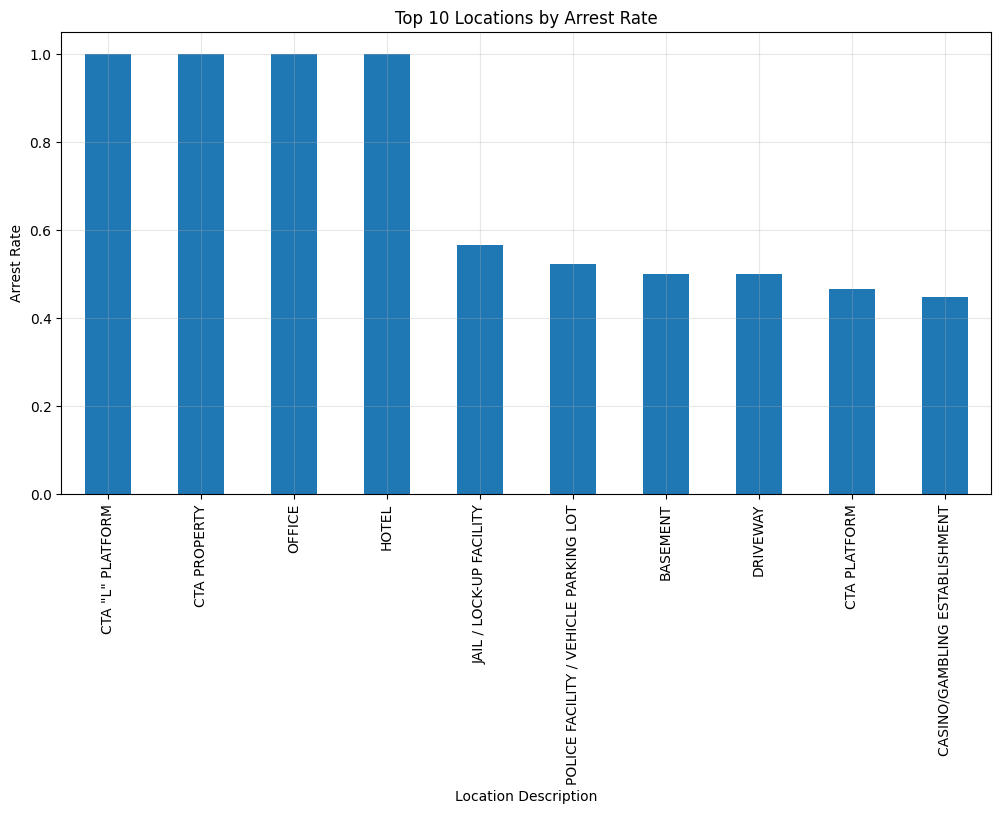

In [20]:
crime.groupby('Location Description')['Arrest'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Locations by Arrest Rate")
plt.ylabel("Arrest Rate")
plt.grid(alpha=0.3)
plt.show()


<h1>Insights</h1>
<h3>Insight 1: Some locations like office, hotel and stations show much higher arrest rates due to controlled environments.</h3>
<h3>Insight 2: In contrast, open areas like driveways often result in fewer arrests since suspects can escape more easily.</h3>

<h1>18. Crimes by Premise Type</h1>

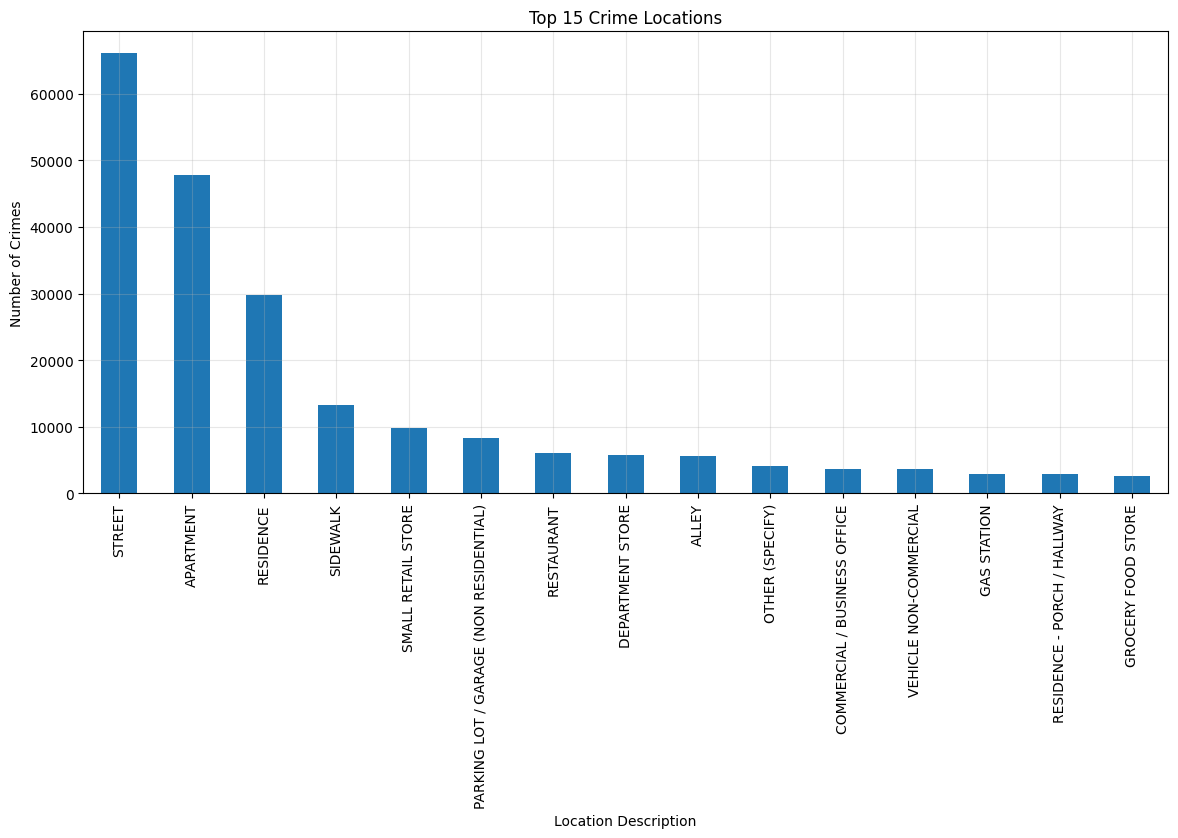

In [21]:
crime['Location Description'].value_counts().head(15).plot(kind='bar', figsize=(14,6))
plt.title("Top 15 Crime Locations")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()

<h1>Insights</h1>
<h3>Insight 1: The distribution across location descriptions highlights how everyday environments such as streets and apartments dominate crime counts.</h3>